In [1]:
from minisom import MiniSom
import pandas as pd
import numpy as np
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = '/net/fs04/d2/xgao/SOM'

In [3]:
def get_var(var, prod):
    df = pd.read_csv(data_path+'/'+prod+'/'+prod+'_daily_8019_SCUS_JFMAMOND_'+var+'_anom.txt', header = None, delim_whitespace=True)
    return df

In [4]:
def concat_df(df_list):
    comb_df = pd.concat(df_list, axis = 1)
    comb = comb_df.values
    return comb

In [5]:
som_shape = (3, 4)

In [6]:
h500_ERA5_df = get_var('h500','ERA5')
slp_ERA5_df = get_var('slp','ERA5')
ivt_ERA5_df = get_var('ivt','ERA5')

ERA5 = concat_df([h500_ERA5_df, slp_ERA5_df, ivt_ERA5_df])
data_ERA5 = np.copy(ERA5)
np.random.seed(10)
np.random.shuffle(data_ERA5)

som_ERA5 = MiniSom(som_shape[0], som_shape[1], data_ERA5.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)
som_ERA5.train_random(data_ERA5, 5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 53.021819634262


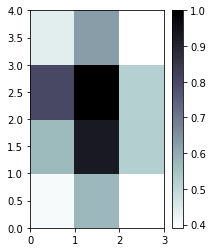

In [9]:
plt.figure(figsize=(3, 4))

plt.pcolor(som_ERA5.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

In [8]:
return_indices = True
winmap_ERA5 = defaultdict(list)
for i, x in enumerate(ERA5):
    winmap_ERA5[som_ERA5.winner(x)].append(i+1 if return_indices else x)

In [11]:
# MERRA2
h500_MERRA2_df = get_var('h500','MERRA2')
slp_MERRA2_df = get_var('slp','MERRA2')
ivt_MERRA2_df = get_var('ivt','MERRA2')

MERRA2 = concat_df([h500_MERRA2_df, slp_MERRA2_df, ivt_MERRA2_df])
data_MERRA2 = np.copy(MERRA2)
np.random.seed(10)
np.random.shuffle(data_MERRA2)

som_MERRA2 = MiniSom(som_shape[0], som_shape[1], data_MERRA2.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)
som_MERRA2.train_random(data_MERRA2, 5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 53.335530150082846


In [12]:
return_indices = True
winmap_MERRA2 = defaultdict(list)
for i, x in enumerate(MERRA2):
    winmap_MERRA2[som_MERRA2.winner(x)].append(i+1 if return_indices else x)

In [13]:
# NARR
h500_NARR_df = get_var('h500','NARR')
slp_NARR_df = get_var('slp','NARR')
ivt_NARR_df = get_var('ivt','NARR')

NARR = concat_df([h500_NARR_df, slp_NARR_df, ivt_NARR_df])
data_NARR = np.copy(NARR)
np.random.seed(10)
np.random.shuffle(data_NARR)

som_NARR = MiniSom(som_shape[0], som_shape[1], data_NARR.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)
som_NARR.train_random(data_NARR, 5000, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 52.908434191816745


In [14]:
return_indices = True
winmap_NARR = defaultdict(list)
for i, x in enumerate(NARR):
    winmap_NARR[som_NARR.winner(x)].append(i+1 if return_indices else x)

In [16]:
common_list_EM = []

for cell in sorted(winmap_ERA5.keys()):
    common = 0
    for i in winmap_ERA5[cell]:
        day = i
        if i in winmap_MERRA2[cell]:
            common += 1
    common_list_EM.append(common)



In [17]:
common_list_EN = []

for cell in sorted(winmap_ERA5.keys()):
    common = 0
    for i in winmap_ERA5[cell]:
        day = i
        if i in winmap_NARR[cell]:
            common += 1
    common_list_EN.append(common)

In [18]:
common_list_MN = []

for cell in sorted(winmap_MERRA2.keys()):
    common = 0
    for i in winmap_MERRA2[cell]:
        day = i
        if i in winmap_NARR[cell]:
            common += 1
    common_list_MN.append(common)


In [154]:
# filename = '../results/MERRA2_node_assignment.txt'
# filehandler = open(filename, 'wt')
# data = str(sorted((winmap_MERRA2.items())))
# filehandler.write(data)
# filehandler.close()

In [23]:
def num_days_node(winmap):
    for cell in sorted(winmap.keys()):
        print(cell, len(winmap[cell]))

In [24]:
num_days_node(winmap_ERA5)

(0, 0) 337
(0, 1) 918
(0, 2) 432
(0, 3) 1131
(1, 0) 1045
(1, 1) 999
(1, 2) 844
(1, 3) 647
(2, 0) 588
(2, 1) 893
(2, 2) 948
(2, 3) 948


In [25]:
num_days_node(winmap_MERRA2)

(0, 0) 303
(0, 1) 667
(0, 2) 563
(0, 3) 666
(1, 0) 700
(1, 1) 722
(1, 2) 566
(1, 3) 1153
(2, 0) 1455
(2, 1) 810
(2, 2) 1036
(2, 3) 1089


In [43]:
num_days_node(winmap_NARR)

(0, 0) 1656
(0, 1) 821
(0, 2) 888
(0, 3) 613
(1, 0) 617
(1, 1) 564
(1, 2) 784
(1, 3) 515
(2, 0) 1129
(2, 1) 809
(2, 2) 659
(2, 3) 675


In [45]:
prod_common = {
    'EM': common_list_EM,
    'EN': common_list_EN,
    'MN':common_list_MN
}

In [46]:
def perc_common(winmap, comp):
    common_list = prod_common[comp]
    for i, cell in enumerate(sorted(winmap.keys())):
        num_days = len(winmap[cell])
        common = common_list[i]
        perc = (common/num_days)*100
        print(perc)

In [58]:
perc_common(winmap_ERA5, 'EM')

78.04154302670622
7.4074074074074066
90.27777777777779
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.10548523206751054
50.0


In [59]:
perc_common(winmap_MERRA2, 'EM')

86.79867986798679
10.194902548725636
69.27175843694494
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09652509652509653
43.52617079889807


In [60]:
perc_common(winmap_ERA5, 'EN')

2.3738872403560833
10.675381263616558
0.0
0.0
6.124401913875598
0.0
9.597156398104266
31.066460587326123
0.0
12.541993281075028
0.10548523206751054
1.0548523206751055


In [61]:
perc_common(winmap_NARR, 'EN')

0.4830917874396135
11.936662606577345
0.0
0.0
10.372771474878444
0.0
10.331632653061225
39.029126213592235
0.0
13.8442521631644
0.15174506828528073
1.4814814814814816


In [62]:
perc_common(winmap_MERRA2, 'MN')

0.9900990099009901
6.746626686656672
0.0
22.07207207207207
0.0
0.9695290858725761
0.88339222614841
0.0
0.8934707903780068
22.469135802469136
0.9652509652509652
0.0


In [63]:
perc_common(winmap_NARR, 'MN')

0.18115942028985507
5.481120584652863
0.0
23.98042414355628
0.0
1.2411347517730498
0.6377551020408163
0.0
1.1514614703277237
22.49690976514215
1.5174506828528074
0.0


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


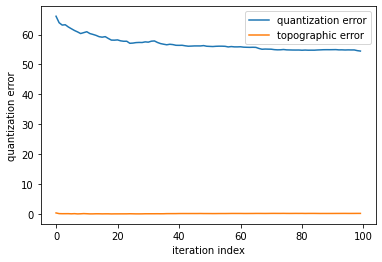

In [68]:
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 100
q_error = []
t_error = []

for i in range(max_iter):
    print(i)
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.legend()
plt.show()
